In [32]:
#import nltk
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from keras.preprocessing.text import text_to_word_sequence
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
stopWords = set(stopwords.words('english'))

from gensim.models.doc2vec import Doc2Vec

# model= Doc2Vec.load("d2v.model")

In [58]:
!wget -c https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

--2019-05-14 18:55:41--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.0.206
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.0.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  6.21MB/s    in 4m 45s  

2019-05-14 19:00:26 (5.51 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [33]:

import gensim
google_model_path= 'https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz'
# Load Google's pre-trained Word2Vec model.
# model = gensim.models.KeyedVectors.load_word2vec_format('./model/GoogleNews-vectors-negative300.bin', binary=True)  
model = gensim.models.KeyedVectors.load_word2vec_format(google_model_path, binary=True, limit=10 ** 5)

In [34]:
df_original = pd.read_csv('../OnlineHarassmentDataset/onlineHarassmentDataset.tdf',
                          sep='\t', 
                          lineterminator='\r',
                          header = 'infer', 
                          encoding='latin-1')
df=df_original.copy(deep = True)

In [35]:
print(df['Tweet'].head())

0    @Grumpy_P_Sloth @deanesmay feminists argue for...
1    1948Army of England helped the Jews to occupy ...
2    Dutch Leader Says Europe to collapse In 6 Week...
3    RT @__DeLay: The next day the Romans and the J...
4    RT @Bakersman_Joe: When Hitler Invited The Jew...
Name: Tweet, dtype: object


In [36]:
# How balanced are the classes?
print('Harassment is ' + str(round(sum(df['Code'] == 'H')/df.shape[0],4) * 100) + '% of the dataset')

Harassment is 25.96% of the dataset


In [37]:
# Quality of Life renaming
df = df[['Code','Tweet']]


In [76]:
df_original['Tweet'][5000]

'RT @DVATW: Man yells \'Allah Akbar! F---ing Jews! Kill the Jews!" at Orthodox teens in London. https: / /t.co /eKAKbBHiy8 Tolerance?'

# List of Regex Strings to Remove

In [39]:
df['Tweet'] = df['Tweet'].apply(lambda Tweet: Tweet.lower())

In [40]:
regex_queries = [
                 '@([A-Za-z0-9_]+)', #Usernames
                'rt\s:\s', #Retweets
                 '(https?:\s?\/\s?\/)(\s)?(www\.)?(\s?)(\w+\.)*([\w\-\s]+\/)*([\w-]+)\/?' # Hyperlinks
                ]

In [41]:
df['Tweet'].replace(regex_queries,'',regex = True, inplace = True)
# Remove symbols, replace with spaces
df['Tweet'].replace('[^\w\s]|_','', regex = True,inplace = True)
# df['Tweet'].replace('/\s+/g','', regex = True,inplace = True)

In [42]:
print(df_original['Tweet'][:10].values)

["@Grumpy_P_Sloth @deanesmay feminists argue for raising minimum wage cause a women's studies major needs the $15 an hour wage at her McJob."
 '1948Army of England helped the Jews to occupy Palestine.After that the Jews killed thousands of Englishmen and returned to England as dogs1'
 'Dutch Leader Says Europe to collapse In 6 Weeks thnks > @BillGates, @GeorgeSoros, & @FWD_us #AltRight #WhiteGenocide https: / /t.co /rl1mh82jda'
 'RT @__DeLay: The next day the Romans and the Jews or watever was like "aye fuck that nigga Jesus. We riding out on his ass today https: / /t.'
 "RT @Bakersman_Joe: When Hitler Invited The Jews To The Smoke Session But It Wasn't The Gas They Was Expecting #MemeHistory https: / /t.co /lMw"
 'RT @billmaher: Bravo to #Netanyahu for his 45 second glare this week at the UN! The Jews have finally done it, they weaponized guilt!'
 'RT @BitchImKermit: White people literally Be like " I\'m not racist you fucking Nigger"'
 'RT @CharlesFinch: "The Jews were provided free 

In [43]:
print(df['Tweet'][:10].values)

['  feminists argue for raising minimum wage cause a womens studies major needs the 15 an hour wage at her mcjob'
 '1948army of england helped the jews to occupy palestineafter that the jews killed thousands of englishmen and returned to england as dogs1'
 'dutch leader says europe to collapse in 6 weeks thnks      altright whitegenocide '
 'the next day the romans and the jews or watever was like aye fuck that nigga jesus we riding out on his ass today '
 'when hitler invited the jews to the smoke session but it wasnt the gas they was expecting memehistory '
 'bravo to netanyahu for his 45 second glare this week at the un the jews have finally done it they weaponized guilt'
 'white people literally be like  im not racist you fucking nigger'
 'the jews were provided free transportation directly to the camps  bill oreilly'
 'i would have killed all the jews in the world but i kept some to show the world why i killed them hitler  '
 '  i can do news i can do newspeople and i am news when

In [44]:
df_original['Tweet'].iloc[9]

"RT @HeymanHustle: .. @MichelleDBeadle I can do news. I can do newspeople. And I AM news. When they say THE JEWS control the media, they're "

In [45]:
df['Tweet'].iloc[2]

'dutch leader says europe to collapse in 6 weeks thnks      altright whitegenocide '

In [46]:


# cv1 = CountVectorizer(stop_words='english')

# X_train_cv1 = cv1.fit_transform(X_train)
# X_test_cv1  = cv1.transform(X_test)

# pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

In [47]:

data = "dutch leader says europe to collapse in 6 weeks thnks      altright whitegenocide "
#stopWords = set(stopwords.words('english'))
words = word_tokenize(data)
wordsFiltered = []

for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)

print(wordsFiltered)

['dutch', 'leader', 'says', 'europe', 'collapse', '6', 'weeks', 'thnks', 'altright', 'whitegenocide']


# Remove Punctuation

In [48]:
# Done already

# def remove_punct(text):
#     text  = "".join([char for char in text if char not in string.punctuation])
#     text = re.sub('[0-9]+', '', text)
#     return text

# df['Tweet_punct'] = df['Tweet'].apply(lambda x: remove_punct(x))
# df.head(10)

# Tokenization

In [49]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet'].apply(lambda x: tokenization(x.lower()))
df.head()

,Code,Tweet,Tweet_tokenized
0,H,feminists argue for raising minimum wage cau...,"[, feminists, argue, for, raising, minimum, wa..."
1,H,1948army of england helped the jews to occupy ...,"[1948army, of, england, helped, the, jews, to,..."
2,H,dutch leader says europe to collapse in 6 week...,"[dutch, leader, says, europe, to, collapse, in..."
3,H,the next day the romans and the jews or wateve...,"[the, next, day, the, romans, and, the, jews, ..."
4,H,when hitler invited the jews to the smoke sess...,"[when, hitler, invited, the, jews, to, the, sm..."


# Remove Stopwords

In [50]:

def remove_stopwords(text):
    text = [word for word in text if word not in stopWords]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,Code,Tweet,Tweet_tokenized,Tweet_nonstop
0,H,feminists argue for raising minimum wage cau...,"[, feminists, argue, for, raising, minimum, wa...","[, feminists, argue, raising, minimum, wage, c..."
1,H,1948army of england helped the jews to occupy ...,"[1948army, of, england, helped, the, jews, to,...","[1948army, england, helped, jews, occupy, pale..."
2,H,dutch leader says europe to collapse in 6 week...,"[dutch, leader, says, europe, to, collapse, in...","[dutch, leader, says, europe, collapse, 6, wee..."
3,H,the next day the romans and the jews or wateve...,"[the, next, day, the, romans, and, the, jews, ...","[next, day, romans, jews, watever, like, aye, ..."
4,H,when hitler invited the jews to the smoke sess...,"[when, hitler, invited, the, jews, to, the, sm...","[hitler, invited, jews, smoke, session, wasnt,..."
5,H,bravo to netanyahu for his 45 second glare thi...,"[bravo, to, netanyahu, for, his, 45, second, g...","[bravo, netanyahu, 45, second, glare, week, un..."
6,H,white people literally be like im not racist ...,"[white, people, literally, be, like, im, not, ...","[white, people, literally, like, im, racist, f..."
7,H,the jews were provided free transportation dir...,"[the, jews, were, provided, free, transportati...","[jews, provided, free, transportation, directl..."
8,H,i would have killed all the jews in the world ...,"[i, would, have, killed, all, the, jews, in, t...","[would, killed, jews, world, kept, show, world..."
9,H,i can do news i can do newspeople and i am n...,"[, i, can, do, news, i, can, do, newspeople, a...","[, news, newspeople, news, say, jews, control,..."


# Stemming / Lemmatization

In [51]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df.head()

,Code,Tweet,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,H,feminists argue for raising minimum wage cau...,"[, feminists, argue, for, raising, minimum, wa...","[, feminists, argue, raising, minimum, wage, c...","[, feminist, argu, rais, minimum, wage, caus, ..."
1,H,1948army of england helped the jews to occupy ...,"[1948army, of, england, helped, the, jews, to,...","[1948army, england, helped, jews, occupy, pale...","[1948armi, england, help, jew, occupi, palesti..."
2,H,dutch leader says europe to collapse in 6 week...,"[dutch, leader, says, europe, to, collapse, in...","[dutch, leader, says, europe, collapse, 6, wee...","[dutch, leader, say, europ, collaps, 6, week, ..."
3,H,the next day the romans and the jews or wateve...,"[the, next, day, the, romans, and, the, jews, ...","[next, day, romans, jews, watever, like, aye, ...","[next, day, roman, jew, watev, like, aye, fuck..."
4,H,when hitler invited the jews to the smoke sess...,"[when, hitler, invited, the, jews, to, the, sm...","[hitler, invited, jews, smoke, session, wasnt,...","[hitler, invit, jew, smoke, session, wasnt, ga..."


In [52]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head(20)

,Code,Tweet,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,H,feminists argue for raising minimum wage cau...,"[, feminists, argue, for, raising, minimum, wa...","[, feminists, argue, raising, minimum, wage, c...","[, feminist, argu, rais, minimum, wage, caus, ...","[, feminist, argue, raising, minimum, wage, ca..."
1,H,1948army of england helped the jews to occupy ...,"[1948army, of, england, helped, the, jews, to,...","[1948army, england, helped, jews, occupy, pale...","[1948armi, england, help, jew, occupi, palesti...","[1948army, england, helped, jew, occupy, pales..."
2,H,dutch leader says europe to collapse in 6 week...,"[dutch, leader, says, europe, to, collapse, in...","[dutch, leader, says, europe, collapse, 6, wee...","[dutch, leader, say, europ, collaps, 6, week, ...","[dutch, leader, say, europe, collapse, 6, week..."
3,H,the next day the romans and the jews or wateve...,"[the, next, day, the, romans, and, the, jews, ...","[next, day, romans, jews, watever, like, aye, ...","[next, day, roman, jew, watev, like, aye, fuck...","[next, day, roman, jew, watever, like, aye, fu..."
4,H,when hitler invited the jews to the smoke sess...,"[when, hitler, invited, the, jews, to, the, sm...","[hitler, invited, jews, smoke, session, wasnt,...","[hitler, invit, jew, smoke, session, wasnt, ga...","[hitler, invited, jew, smoke, session, wasnt, ..."
5,H,bravo to netanyahu for his 45 second glare thi...,"[bravo, to, netanyahu, for, his, 45, second, g...","[bravo, netanyahu, 45, second, glare, week, un...","[bravo, netanyahu, 45, second, glare, week, un...","[bravo, netanyahu, 45, second, glare, week, un..."
6,H,white people literally be like im not racist ...,"[white, people, literally, be, like, im, not, ...","[white, people, literally, like, im, racist, f...","[white, peopl, liter, like, im, racist, fuck, ...","[white, people, literally, like, im, racist, f..."
7,H,the jews were provided free transportation dir...,"[the, jews, were, provided, free, transportati...","[jews, provided, free, transportation, directl...","[jew, provid, free, transport, directli, camp,...","[jew, provided, free, transportation, directly..."
8,H,i would have killed all the jews in the world ...,"[i, would, have, killed, all, the, jews, in, t...","[would, killed, jews, world, kept, show, world...","[would, kill, jew, world, kept, show, world, k...","[would, killed, jew, world, kept, show, world,..."
9,H,i can do news i can do newspeople and i am n...,"[, i, can, do, news, i, can, do, newspeople, a...","[, news, newspeople, news, say, jews, control,...","[, news, newspeopl, news, say, jew, control, m...","[, news, newspeople, news, say, jew, control, ..."


In [53]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopWords]  # remove stopwords and stemming
    return text
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df['Tweet'])
print('{} Number of Tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
print(countVectorizer.get_feature_names())
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())


20360 Number of Tweets has 19886 words
['', 'aaaaaaarm', 'aaaaaangel', 'aaaaallllll', 'aaayye', 'aafreedibi', 'aahahah', 'aamer', 'aamerica', 'aampm', 'aan', 'aand', 'aangirfan', 'aaron', 'aaronperski', 'aarpbitch', 'aashora', 'ab', 'aba', 'abacha', 'abandon', 'abayudaya', 'abba', 'abbey', 'abbott', 'abbrevi', 'abc', 'abdel', 'abduct', 'abdulawadi', 'abdulazeez', 'abdullah', 'abdulnnfullmoosa', 'abel', 'aber', 'abhorr', 'abi', 'abid', 'abil', 'abit', 'abl', 'ablebodi', 'abnomin', 'abo', 'abolish', 'abombin', 'abomin', 'abong', 'aborigin', 'abort', 'abortionchildmurd', 'abortionmuh', 'aboud', 'abound', 'abradolf', 'abraham', 'abrahm', 'abramson', 'abroad', 'abrog', 'absenc', 'absencc', 'absent', 'absente', 'absolut', 'absoluto', 'absolv', 'absorb', 'abstract', 'absurd', 'absurda', 'abt', 'abu', 'abuela', 'abul', 'abus', 'abusewhi', 'abut', 'abvot', 'ac', 'aca', 'academ', 'academes', 'academi', 'academia', 'academyaward', 'acc', 'acceler', 'accent', 'accept', 'access', 'accid', 'accident

(-0.5, 399.5, 199.5, -0.5)

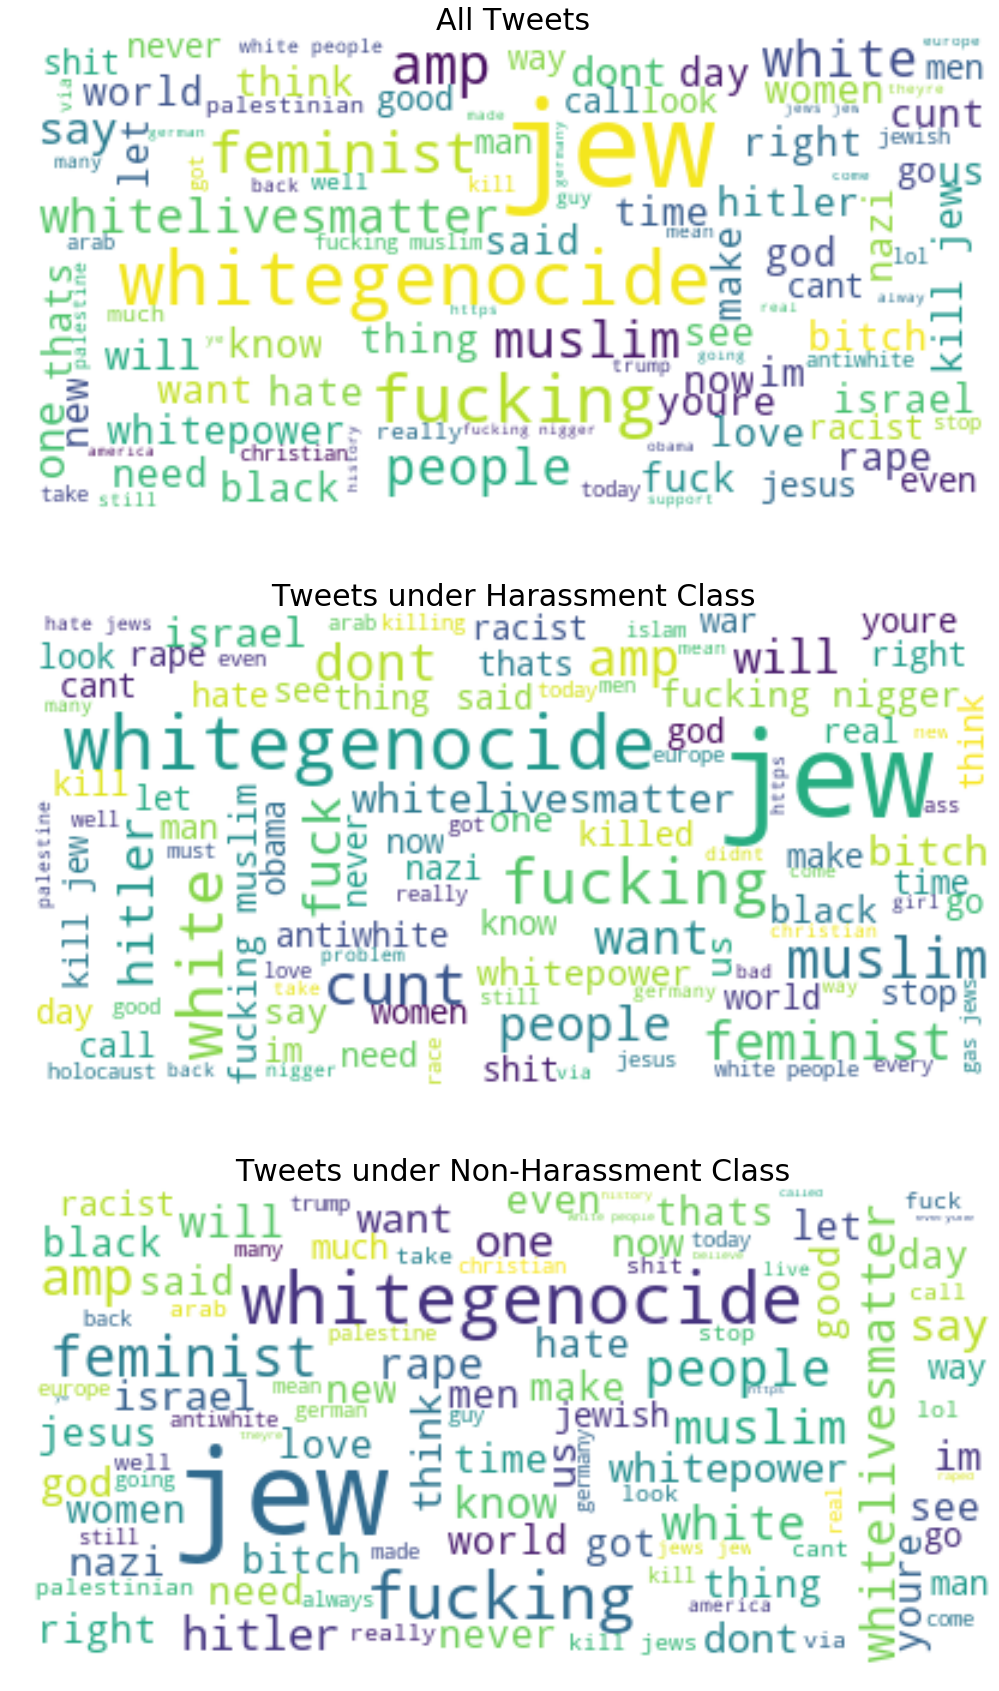

In [54]:
df_H = df[df['Code']=='H']
df_NH = df[df['Code']=='N']
Tweet_All = " ".join(review for review in df.Tweet)
Tweet_H = " ".join(review for review in df_H.Tweet)
Tweet_NH = " ".join(review for review in df_NH.Tweet)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Tweet_All)
wordcloud_H = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Tweet_H)
wordcloud_NH = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(Tweet_NH)
# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_H, interpolation='bilinear')
ax[1].set_title('Tweets under Harassment Class',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_NH, interpolation='bilinear')
ax[2].set_title('Tweets under Non-Harassment Class',fontsize=30)
ax[2].axis('off')

In [55]:
documents = [i for i in df['Tweet_lemmatized']]

In [56]:
for i in df['Tweet_lemmatized']:
   i 

In [57]:
vec_size = 20
alpha = 0.025
model = Doc2Vec(documents,vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)

AttributeError: 'list' object has no attribute 'words'

In [ ]:
df['Tweet_lemmatized'].apply(lambda tweet: model.infer_vector(tweet))